StyleGan2 Practice

In [ ]:
%tensorflow_version 1.x
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!git clone https://github.com/NVLabs/stylegan2-ada.git

Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 74, done.
remote: Total 74 (delta 0), reused 0 (delta 0), pack-reused 74
Unpacking objects: 100% (74/74), done.


In [ ]:
!ls /content/stylegan2-ada/

calc_metrics.py  Dockerfile   LICENSE.txt   README.md	     train.py
dataset_tool.py  docs	      metrics	    style_mixing.py
dnnlib		 generate.py  projector.py  training


In [ ]:
!python /content/stylegan2-ada/generate.py \
  --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl \
--outdir=/content/results --seeds=6600-6625

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.
Generating image for seed 6600 (0/26) ...
Generating image for seed 6601 (1/26) ...
Generating image for seed 6602 (2/26) ...
Generating image for seed 6603 (3/26) ...
Generating image for seed 6604 (4/26) ...
Generating image for seed 6605 (5/26) ...
Generating image for seed 6606 (6/26) ...
Generating image for seed 6607 (7/26) ...
Generating image for seed 6608 (8/26) ...
Generating image for seed 6609 (9/26) ...
Generating image for seed 6610 (10/26) ...
Generating image for seed 6611 (11/26) ...
Generating image for seed 6612 (12/26) ...
Generating image for seed 6613 (13/26) ...
Generating image for seed 6614 (14/26) ...
Generating image for seed 6615 (15/26) ...
Generating image for seed 6616 (16/26) ...
Generating image for seed 661

In [ ]:
import sys
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt

sys.path.insert(0, '/content/stylegan2-ada')

import dnnlib
import dnnlib.tflib as tflib

def seed2vec(Gs, seed):
  rnd = np.random.RandomState(seed)
  return rnd.randn(1, *Gs.input_shape[1:])

def init_random_state(Gs, seed):
  rnd = np.random.RandomState(seed)
  noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
  tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars})

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(Gs, z, truncation_psi):
  Gs_kwargs = {
      'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
      'randomize_noise': False
  }
  if truncation_psi is not None:
    Gs_kwargs['truncation_psi'] = truncation_psi
  
  label = np.zeros([1] + Gs.input_shapes[1][1:])
  images = Gs.run(z, label, **Gs_kwargs)
  return images[0]

In [ ]:
import IPython.display

URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"
tflib.init_tf()
print('Loading networks from "%s"...' % URL)
with dnnlib.util.open_url(URL) as fp:
  _G, _D, Gs = pickle.load(fp)

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"...


Seed 1000


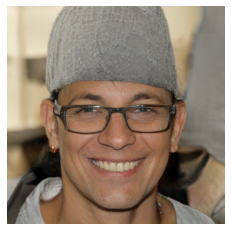

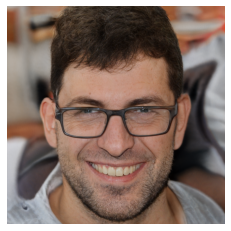

Seed 1001


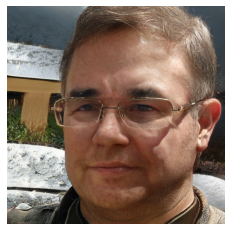

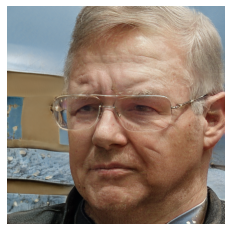

Seed 1002


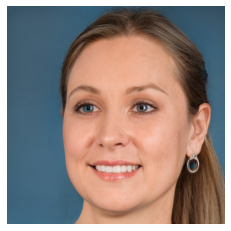

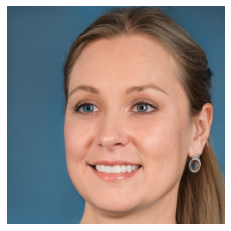

In [ ]:
SEED_FROM = 1000
SEED_TO = 1003

for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  init_random_state(Gs, 10)
  z = seed2vec(Gs, i)

  img = generate_image(Gs, z, 1.0)
  display_image(img)
  z[0][0] *= 10.1
  img = generate_image(Gs, z, 1.0)
  display_image(img)